- TITANIC 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I have build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

- Steps Involved:

1. Import Libraries: Import necessary libraries for data manipulation, visualization, and model building.

2. Load and Explore the Dataset: Load the dataset and explore its structure, summary statistics, and missing values.

3. Preprocess the Data: Handle missing values, convert categorical variables to numerical, and normalize the data.

4. Split the Data: Split the dataset into training and testing sets.

5. Build the Model: Choose a machine learning model and train it on the training set.

6. Evaluate the Model: Evaluate the model's performance using the testing set.

7. Make Predictions: Use the model to make predictions on new data.


1. Load and Explore the Dataset

First, let's load the dataset and explore its structure:

In [56]:
import pandas as pd

# Load the dataset
file_path = '/Users/rishikasingh/Downloads/Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2. Preprocess the Data

Next, we'll preprocess the data by handling missing values, encoding categorical variables, and scaling the features.

In [57]:
# Drop unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Convert categorical columns to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Display the first few rows of the processed dataset
print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0


3. Build and Train the Model

We'll split the data into training and testing sets, then build and train a logistic regression model.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

4. Evaluate the Model

Finally, we'll evaluate the model's performance using accuracy, confusion matrix, and classification report.

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7988826815642458
Confusion Matrix:
[[89 16]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



- Visualisations

1. Distribution of Survival

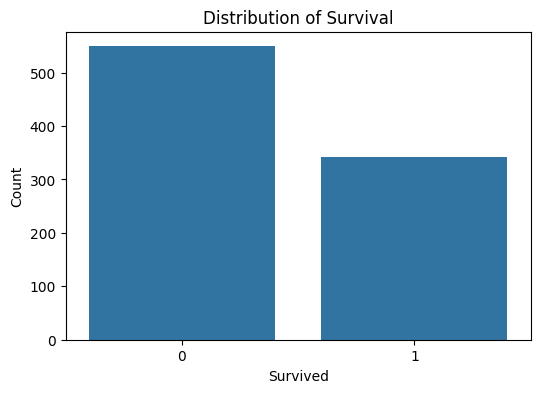

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

2. Survival by Gender

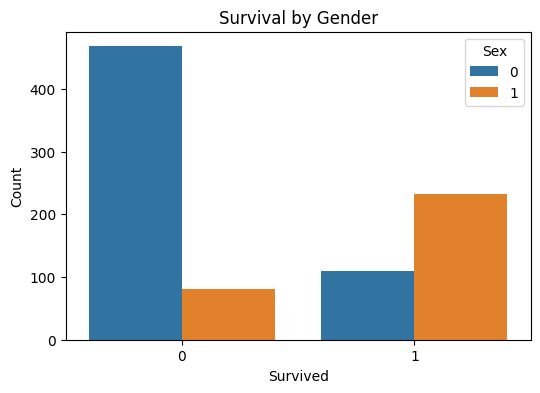

In [61]:
# Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

3. Survival by Passenger Class

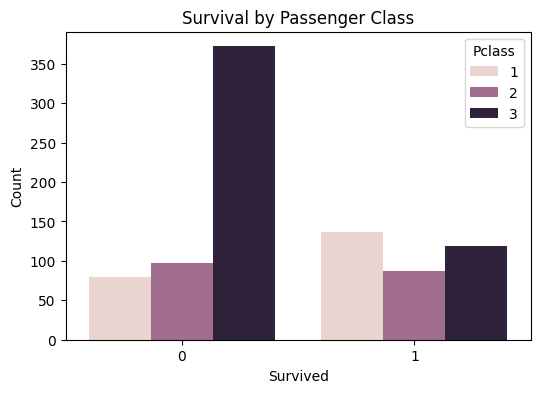

In [62]:
# Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

4. Age Distribution of Survivors vs Non-Survivors

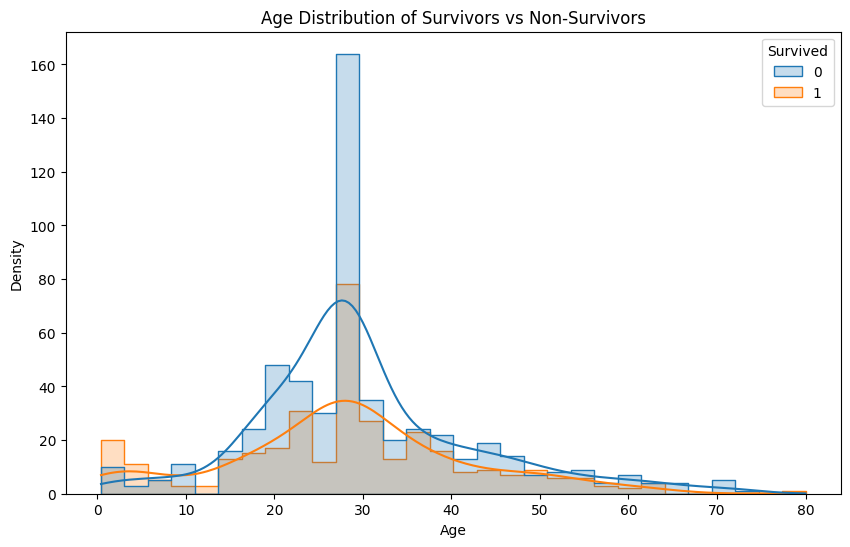

In [63]:
# Age Distribution of Survivors vs Non-Survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

5. Survival by Embarked Location

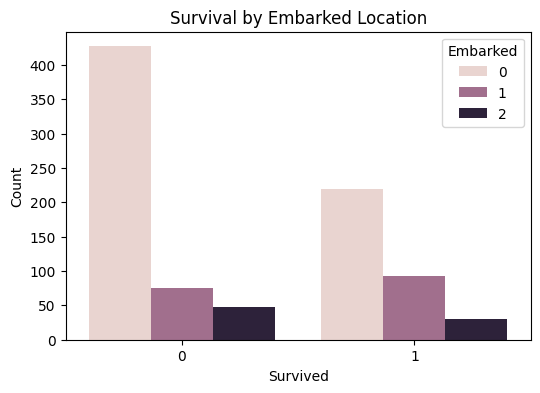

In [64]:
# Survival by Embarked Location
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Embarked', data=data)
plt.title('Survival by Embarked Location')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()

6. Correlation Heatmap

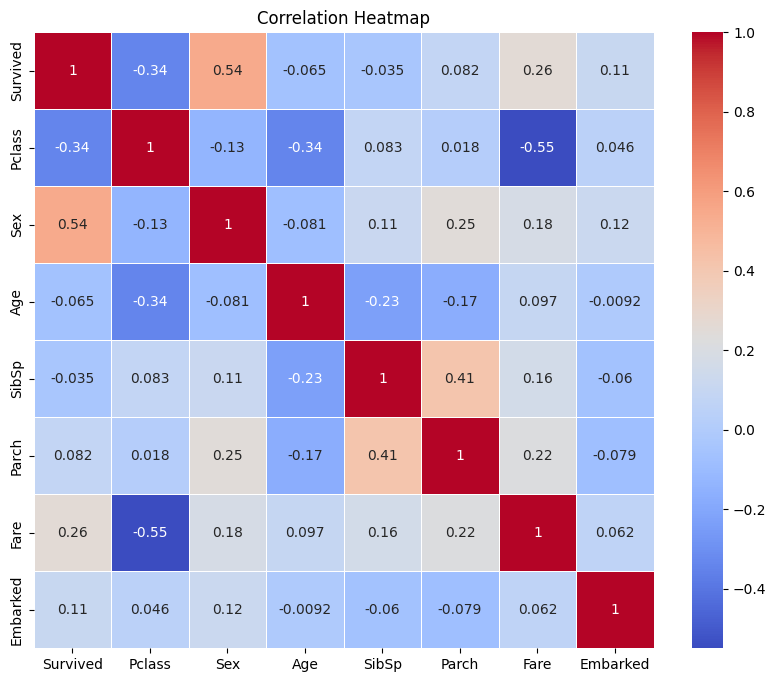

In [65]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()